In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten, LSTM
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam

from numpy import array
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline

# Importing Data and Pre Processing


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
toxic_comments = pd.read_csv("/content/drive/MyDrive/AI and ML/data.csv")

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2175560697773516744
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13874214679874848461
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
toxic_comments.head()

,Unnamed: 0,sentence,label
0,0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,sentence
1,1,"Born and raised in Houston, Texas, she perform...",sentence
2,2,"Managed by her father, Mathew Knowles, the gro...",sentence
3,3,Their hiatus saw the release of Beyoncé's debu...,sentence
4,4,Following the disbandment of Destiny's Child i...,sentence


In [ ]:
print(toxic_comments.shape)

(235110, 3)


Pre- Processing Text

In [ ]:
filter = toxic_comments["sentence"] != ""
toxic_comments = toxic_comments[filter]
toxic_comments = toxic_comments.dropna()

In [ ]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
X = []
sentences = list(toxic_comments["sentence"])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
toxic = toxic_comments[["label"]]!='sentence'


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
my_stopwords = stopwords.words('english')

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/content/drive/MyDrive/AI and ML/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [ ]:
embeddings_dictionary['catch']

array([-0.04352  , -0.14817  ,  0.4887   , -0.73157  , -0.27412  ,
       -0.2209   , -0.3089   , -0.27377  , -0.60622  , -0.7049   ,
        0.10406  ,  0.57047  ,  0.015561 , -0.23216  ,  0.48222  ,
        0.27009  , -0.085793 ,  0.6049   , -0.34284  ,  0.55571  ,
        0.47642  ,  0.032829 ,  0.41443  , -0.81573  ,  0.80234  ,
        0.66844  , -0.99587  , -0.10888  ,  0.27639  , -0.29908  ,
       -0.80385  ,  0.39616  ,  0.015443 ,  0.36918  ,  0.25073  ,
        0.15033  , -0.65484  ,  0.1781   ,  0.22782  ,  0.16301  ,
       -0.26588  ,  0.054827 , -0.17984  , -0.25614  ,  0.11202  ,
        0.35409  ,  0.35002  , -0.59873  , -0.48477  , -0.36231  ,
       -0.10032  ,  0.74191  , -0.19666  ,  0.96941  , -0.25967  ,
       -1.7774   , -0.95846  ,  0.14345  ,  1.4703   ,  0.098012 ,
       -0.71111  ,  0.28937  , -0.20434  ,  0.22107  ,  0.40271  ,
        0.17397  ,  0.75147  , -0.36158  ,  0.14086  , -0.085578 ,
       -0.54237  , -0.48543  ,  0.43897  , -0.040572 , -0.2405

# Vectorizing Text


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = my_stopwords)
bag_of_words = vectorizer.fit_transform(X)

In [ ]:
print("Sparsity of bag_of_words:", len(bag_of_words.data)/(bag_of_words.shape[0]*bag_of_words.shape[1])*100)

Sparsity of bag_of_words: 0.010166580998703172


In [ ]:
len(bag_of_words.data)

1919550

In [ ]:
print(bag_of_words.shape, len(vectorizer.vocabulary_))

(235110, 80307) 80307


In [ ]:
embeds = []
zeros_embed = 100*[0]
for key,val in sorted(vectorizer.vocabulary_.items(), key = lambda kv:(kv[1], kv[0])):
# vectorizer.vocabulary_.keys():
    if key in embeddings_dictionary:
        embeds.append(embeddings_dictionary[key])
    else:
        embeds.append(zeros_embed)
    if val%1000 == 0:
        print(val,key)


0 aa
1000 adrenalin
2000 alexiou
3000 angelopoulos
4000 archaemenid
5000 atid
6000 bailout
7000 befriend
8000 bishnois
9000 bourienne
10000 bundles
11000 carb
12000 cfc
13000 chrysaetos
14000 cognitivist
15000 confidante
16000 corroborated
17000 culls
18000 decimate
19000 desperation
20000 disclosing
21000 douglaston
22000 eddystone
23000 encrusting
24000 estuaries
25000 eyck
26000 fierceness
27000 formio
28000 gallega
29000 gimignano
30000 gregg
31000 hamouli
32000 henceforth
33000 honory
34000 idetify
35000 inductive
36000 interties
37000 jd
38000 karko
39000 koan
40000 lapse
41000 libido
42000 loves
43000 malinke
44000 matthaei
45000 metamorphosed
46000 mittlere
47000 mousebird
48000 nari
49000 niemeyer
50000 nya
51000 orbach
52000 pacta
53000 patrum
54000 phenomes
55000 plotted
56000 pramana
57000 proposes
58000 quations
59000 reasserted
60000 remarkable
61000 rhin
62000 rrna
63000 sapere
64000 secretaries
65000 sheesh
66000 situpa
67000 sopwith
68000 standing
69000 subordinate
700

In [ ]:
import scipy.sparse as sparse
my_embeddings = sparse.csr_matrix(embeds)

In [ ]:
doc_embeds = bag_of_words.dot(my_embeddings)

In [ ]:
doc_embeds.shape

(235110, 100)

#Training (LR, DT, RF)

In [ ]:
X_train_de, X_test_de, y_train_de, y_test_de = train_test_split(doc_embeds, toxic, test_size=0.20, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=25)
rf = RandomForestClassifier(max_depth=15, n_estimators=40)
clf = SVC(kernel='linear',gamma='auto',degree=2)

In [ ]:
lr.fit(X_train_de,y_train_de)
dt.fit(X_train_de,y_train_de)
rf.fit(X_train_de,y_train_de)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-66-704593fa2800>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_de,y_train_de)


RandomForestClassifier(max_depth=15, n_estimators=40)

In [ ]:
#clf.fit(X_train_de,y_train_de)

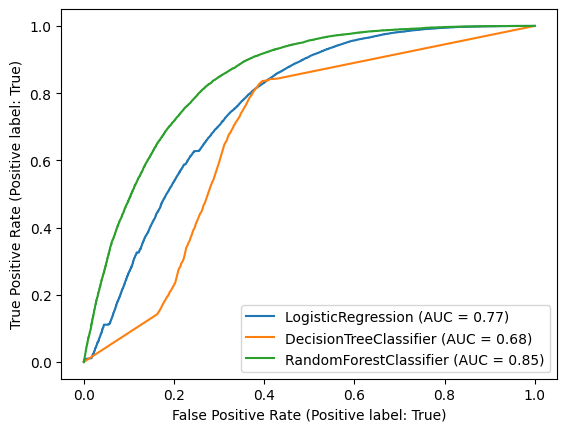

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
disp = RocCurveDisplay.from_estimator(lr,X_test_de,y_test_de)
RocCurveDisplay.from_estimator(dt,X_test_de,y_test_de,ax=disp.ax_)
RocCurveDisplay.from_estimator(rf,X_test_de,y_test_de,ax=disp.ax_)
# RocCurveDisplay.from_estimator(clf,X_test,y_test,ax=disp.ax_)

In [ ]:
# from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
maxlen=100
l1_thres = 1e-4
l2_thres = 1e-5
deep_inputs = Input(shape=(maxlen,))
dense_layer_1 = Dense(128, activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=l1_thres, l2=l2_thres))(deep_inputs)
dense_layer_2 = Dense(64, activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=l1_thres, l2=l2_thres))(dense_layer_1)
dense_layer_3 = Dense(32, activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=l1_thres, l2=l2_thres))(dense_layer_2)
dense_layer_4 = Dense(16, activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=l1_thres, l2=l2_thres))(dense_layer_3)
dense_layer_5 = Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l1_l2(l1=l1_thres, l2=l2_thres))(dense_layer_4)
model = Model(inputs=deep_inputs, outputs=dense_layer_5)
opt = Adam()
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])

In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 128)               12928     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 23809 (93.00 KB)
Trainable params: 23809 (93.00

In [ ]:
X_res = X_train_de.todense()
y_res = y_train_de
# ros = RandomOverSampler(random_state=42)
# X_res, y_res = ros.fit_resample(X_train, y_train)
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
history = model.fit(X_res, y_res, batch_size=256, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
588/588 [==============================] - 8s 7ms/step - loss: 0.6858 - acc: 0.7512 - val_loss: 0.6168 - val_acc: 0.7867
Epoch 2/50
588/588 [==============================] - 3s 5ms/step - loss: 0.5805 - acc: 0.7980 - val_loss: 0.5684 - val_acc: 0.7997
Epoch 3/50
588/588 [==============================] - 4s 7ms/step - loss: 0.5451 - acc: 0.8053 - val_loss: 0.5459 - val_acc: 0.7990
Epoch 4/50
588/588 [==============================] - 3s 5ms/step - loss: 0.5235 - acc: 0.8113 - val_loss: 0.5211 - val_acc: 0.8087
Epoch 5/50
588/588 [==============================] - 4s 7ms/step - loss: 0.5101 - acc: 0.8137 - val_loss: 0.5176 - val_acc: 0.8057
Epoch 6/50
588/588 [==============================] - 4s 7ms/step - loss: 0.5017 - acc: 0.8146 - val_loss: 0.5094 - val_acc: 0.8058
Epoch 7/50
588/588 [==============================] - 3s 5ms/step - loss: 0.4924 - acc: 0.8168 - val_loss: 0.4986 - val_acc: 0.8101
Epoch 8/50
588/588 [==============================] - 3s 5ms/step - loss: 0.

In [ ]:
from tensorflow.keras import Model
def conf(my_model,thres,test_data,test_y):
    if isinstance(my_model, Model):
        output = my_model.predict(test_data)
    else:
        output = my_model.predict_proba(test_data)[:,list(my_model.classes_).index(True)]
    pred = (output>thres)
    from sklearn.metrics import confusion_matrix
    return confusion_matrix(test_y, pred)

In [ ]:
#conf(model,0.5,X_test_de,y_test_de)

In [ ]:
conf(lr,0.5,X_test_de,y_test_de)

array([[12837,  7767],
       [ 5030, 21388]])

In [ ]:
conf(dt,0.5,X_test_de,y_test_de)

array([[12609,  7995],
       [ 4601, 21817]])

In [ ]:
conf(rf,0.5,X_test_de,y_test_de)

array([[12584,  8020],
       [ 2270, 24148]])

In [ ]:
import matplotlib.pyplot as plt
def plot_training_data(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])

    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

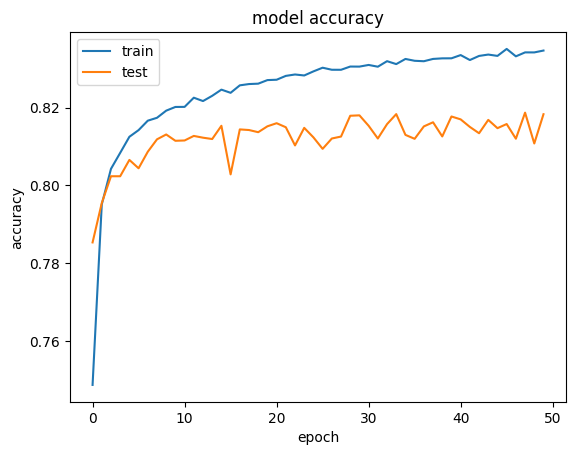

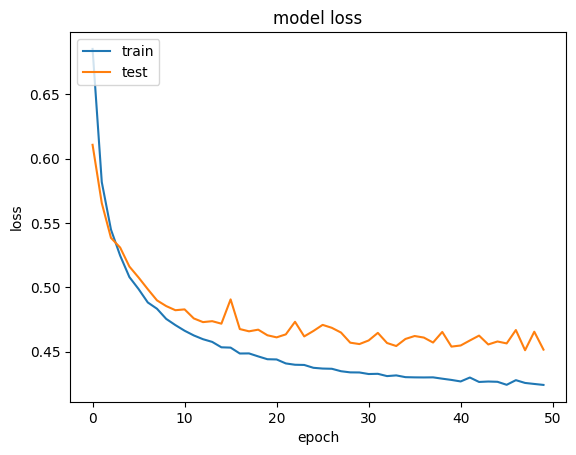

In [ ]:
plot_training_data(history)

# Training LSTM Model

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [ ]:
Y=toxic
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
X_train

array([[2659,    1,  505, ...,    0,    0,    0],
       [   3,    5,   37, ...,    0,    0,    0],
       [  19,  728,    1, ...,    0,    0,    0],
       ...,
       [   5, 1014, 2297, ...,    0,    0,    0],
       [   5,   82,    2, ...,    0,    0,    0],
       [   5,  225, 1590, ...,    0,    0,    0]], dtype=int32)

In [ ]:
tokenizer.word_index

{'the': 1,
 'of': 2,
 'in': 3,
 'and': 4,
 'what': 5,
 'to': 6,
 'is': 7,
 'was': 8,
 'for': 9,
 'as': 10,
 'did': 11,
 'by': 12,
 'that': 13,
 'with': 14,
 'on': 15,
 'are': 16,
 'from': 17,
 'which': 18,
 'who': 19,
 'were': 20,
 'how': 21,
 'when': 22,
 'at': 23,
 'be': 24,
 'an': 25,
 'it': 26,
 'many': 27,
 'or': 28,
 'have': 29,
 'not': 30,
 'has': 31,
 'first': 32,
 'his': 33,
 'this': 34,
 'their': 35,
 'does': 36,
 'year': 37,
 'where': 38,
 'its': 39,
 'other': 40,
 'one': 41,
 'had': 42,
 'most': 43,
 'also': 44,
 'new': 45,
 'city': 46,
 'used': 47,
 'do': 48,
 'during': 49,
 'can': 50,
 'after': 51,
 'been': 52,
 'he': 53,
 'more': 54,
 'but': 55,
 'they': 56,
 'two': 57,
 'some': 58,
 'th': 59,
 'into': 60,
 'all': 61,
 'such': 62,
 'name': 63,
 'people': 64,
 'world': 65,
 'time': 66,
 'state': 67,
 'between': 68,
 'century': 69,
 'there': 70,
 'than': 71,
 'part': 72,
 'war': 73,
 'states': 74,
 'use': 75,
 'about': 76,
 'only': 77,
 'over': 78,
 'would': 79,
 'called':

In [ ]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

Glove Vector

In [ ]:
from tensorflow.keras import regularizers
k1_thres = 1e-5
k2_thres = 1e-5
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(256,kernel_regularizer=regularizers.l1_l2(l1=k1_thres, l2=k2_thres))(embedding_layer)
dense_layer_1 = Dense(128, activation='sigmoid',kernel_regularizer=regularizers.l1_l2(l1=k1_thres, l2=k2_thres))(LSTM_Layer_1)
dense_layer_2 = Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l1_l2(l1=k1_thres, l2=k2_thres))(dense_layer_1)
model_lstm_trans_reg = Model(inputs=deep_inputs, outputs=dense_layer_2)
opt = Adam()
model_lstm_trans_reg.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])

In [ ]:
print(model_lstm_trans_reg.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 100)          7389200   
                                                                 
 lstm (LSTM)                 (None, 256)               365568    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 7787793 (29.71 MB)
Trainable params: 398593 (1.52 MB)
Non-trainable params: 7389200 (28.19 MB)
_________________________________________________________________
None


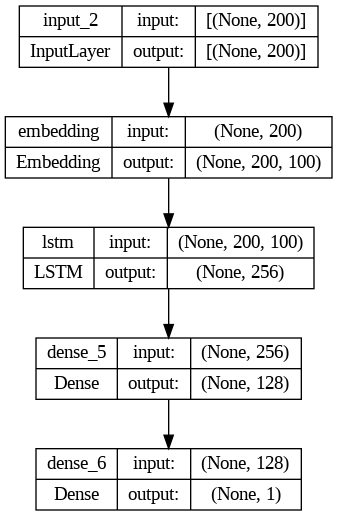

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_lstm_trans_reg, to_file='/content/drive/MyDrive/AI and ML/model_plot4a.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.

In [ ]:
history = model_lstm_trans_reg.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
1176/1176 [==============================] - 37s 31ms/step - loss: 0.6874 - acc: 0.5580 - val_loss: 0.6865 - val_acc: 0.5590
Epoch 2/20
1176/1176 [==============================] - 36s 30ms/step - loss: 0.6875 - acc: 0.5580 - val_loss: 0.6865 - val_acc: 0.5590
Epoch 3/20
1176/1176 [==============================] - 35s 30ms/step - loss: 0.6872 - acc: 0.5580 - val_loss: 0.6866 - val_acc: 0.5590
Epoch 4/20
1176/1176 [==============================] - 33s 28ms/step - loss: 0.6874 - acc: 0.5580 - val_loss: 0.6866 - val_acc: 0.5590
Epoch 5/20
1176/1176 [==============================] - 33s 28ms/step - loss: 0.6874 - acc: 0.5580 - val_loss: 0.6874 - val_acc: 0.5590
Epoch 6/20
1176/1176 [==============================] - 33s 28ms/step - loss: 0.6875 - acc: 0.5580 - val_loss: 0.6872 - val_acc: 0.5590
Epoch 7/20
1176/1176 [==============================] - 33s 28ms/step - loss: 0.6874 - acc: 0.5580 - val_loss: 0.6866 - val_acc: 0.5590
Epoch 8/20
1176/1176 [==========================

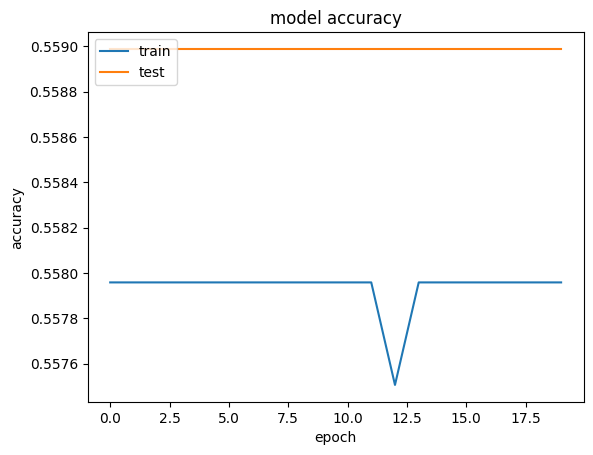

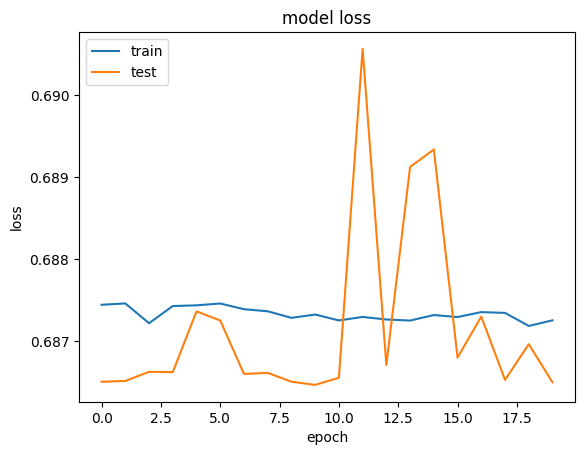

In [ ]:
plot_training_data(history)

Tunable Glove Vector

In [ ]:
from tensorflow.keras import regularizers

deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=True)(deep_inputs)
LSTM_Layer_1 = LSTM(256)(embedding_layer)
dense_layer_1 = Dense(128, activation='sigmoid')(LSTM_Layer_1)
dense_layer_2 = Dense(1, activation='sigmoid')(dense_layer_1)
model_lstm_trans_tune = Model(inputs=deep_inputs, outputs=dense_layer_2)
opt = Adam()
model_lstm_trans_tune.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])

In [ ]:
print(model_lstm_trans_tune.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 200, 100)          7389200   
                                                                 
 lstm_1 (LSTM)               (None, 256)               365568    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 7787793 (29.71 MB)
Trainable params: 7787793 (29.71 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


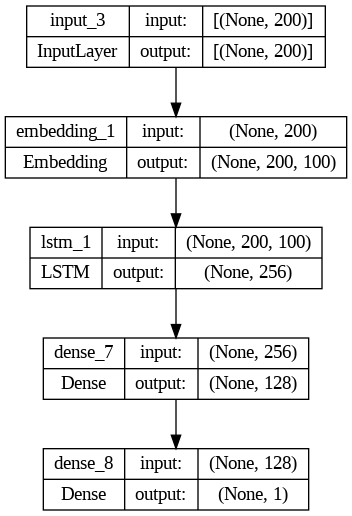

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_lstm_trans_tune, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model_lstm_trans_tune.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
1176/1176 [==============================] - 72s 59ms/step - loss: 0.6899 - acc: 0.5553 - val_loss: 0.6873 - val_acc: 0.5590
Epoch 2/20
1176/1176 [==============================] - 39s 33ms/step - loss: 0.6872 - acc: 0.5580 - val_loss: 0.6862 - val_acc: 0.5590
Epoch 3/20
1176/1176 [==============================] - 39s 33ms/step - loss: 0.6871 - acc: 0.5580 - val_loss: 0.6869 - val_acc: 0.5590
Epoch 4/20
1176/1176 [==============================] - 37s 31ms/step - loss: 0.6872 - acc: 0.5569 - val_loss: 0.6872 - val_acc: 0.5590
Epoch 5/20
1176/1176 [==============================] - 37s 31ms/step - loss: 0.6871 - acc: 0.5580 - val_loss: 0.6862 - val_acc: 0.5590
Epoch 6/20
1176/1176 [==============================] - 37s 31ms/step - loss: 0.6869 - acc: 0.5580 - val_loss: 0.6862 - val_acc: 0.5590
Epoch 7/20
1176/1176 [==============================] - 37s 32ms/step - loss: 0.6872 - acc: 0.5577 - val_loss: 0.6862 - val_acc: 0.5590
Epoch 8/20
1176/1176 [==========================

In [ ]:
vec = 105
my_emb = model_lstm_trans_tune.layers[1].get_weights()[0][vec,:]
len = my_emb.dot(my_emb)
print(len)

40.08772


In [ ]:
orig_emb = embedding_matrix[vec,:]
len1 = orig_emb.dot(orig_emb)
print(len1)

40.087675060771055


In [ ]:
import math
my_emb.dot(orig_emb)/(math.sqrt(len)*math.sqrt(len1))

1.0000000306883192

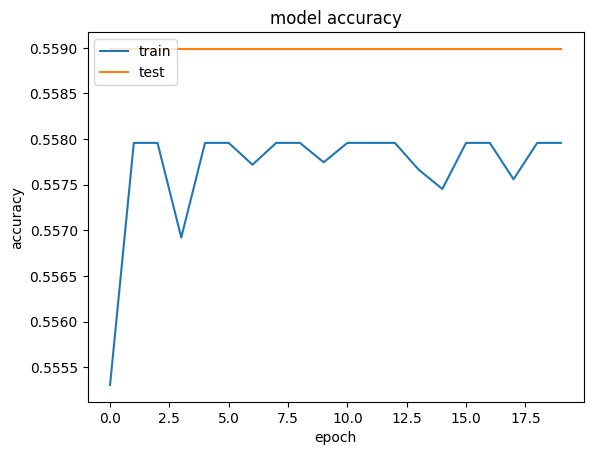

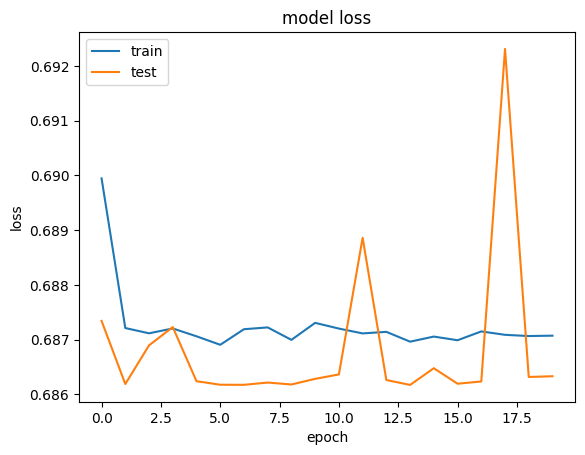

In [ ]:
plot_training_data(history)

### Tuning Embedding from Scratch


In [ ]:
from tensorflow.keras import regularizers
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100)(deep_inputs)
LSTM_Layer_1 = LSTM(256,kernel_regularizer=regularizers.l1_l2(l1=1e-6, l2=1e-5))(embedding_layer)
dense_layer_1 = Dense(128, activation='sigmoid',kernel_regularizer=regularizers.l1_l2(l1=1e-6, l2=1e-5))(LSTM_Layer_1)
dense_layer_2 = Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l1_l2(l1=1e-6, l2=1e-5))(dense_layer_1)
model_lstm_tune = Model(inputs=deep_inputs, outputs=dense_layer_2)
opt = Adam()
model_lstm_tune.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])

In [ ]:
history = model_lstm_tune.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
1176/1176 [==============================] - 59s 48ms/step - loss: 0.6879 - acc: 0.5580 - val_loss: 0.6862 - val_acc: 0.5590
Epoch 2/20
1176/1176 [==============================] - 39s 33ms/step - loss: 0.6872 - acc: 0.5579 - val_loss: 0.6879 - val_acc: 0.5590
Epoch 3/20
1176/1176 [==============================] - 40s 34ms/step - loss: 0.6871 - acc: 0.5580 - val_loss: 0.6866 - val_acc: 0.5590
Epoch 4/20
1176/1176 [==============================] - 37s 31ms/step - loss: 0.6872 - acc: 0.5580 - val_loss: 0.6867 - val_acc: 0.5590
Epoch 5/20
1176/1176 [==============================] - 36s 31ms/step - loss: 0.6872 - acc: 0.5580 - val_loss: 0.6868 - val_acc: 0.5590
Epoch 6/20
1176/1176 [==============================] - 38s 33ms/step - loss: 0.6872 - acc: 0.5580 - val_loss: 0.6867 - val_acc: 0.5590
Epoch 7/20
1176/1176 [==============================] - 36s 31ms/step - loss: 0.6871 - acc: 0.5580 - val_loss: 0.6862 - val_acc: 0.5590
Epoch 8/20
1176/1176 [==========================

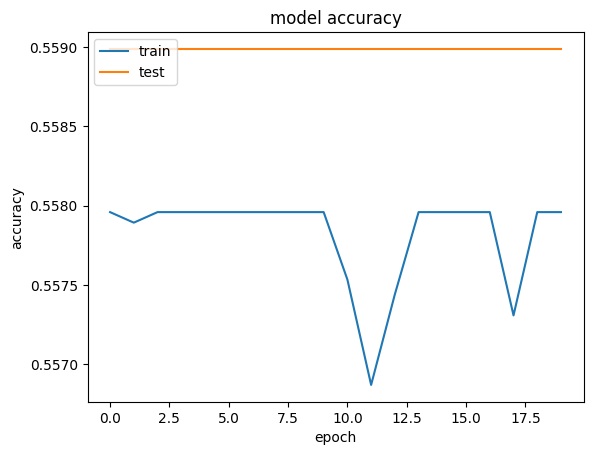

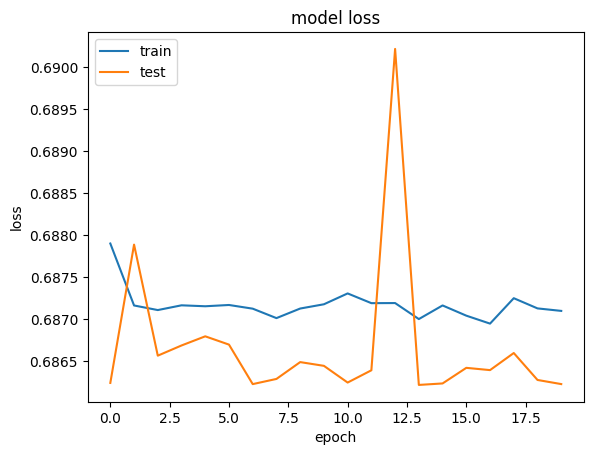

In [ ]:
plot_training_data(history)

## Bi LSTM Models

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Bidirectional

deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100,weights=[embedding_matrix], trainable=False)(deep_inputs)
BLSTM_Layer_1 = Bidirectional(LSTM(64, kernel_regularizer=regularizers.l1_l2(l1=1e-6, l2=1e-5)), input_shape=(maxlen, 1), merge_mode='concat')(embedding_layer)
dropout_layer1 = Dropout(0.7)(BLSTM_Layer_1)
dense_layer_1 = Dense(64, activation='sigmoid',kernel_regularizer=regularizers.l1_l2(l1=1e-6, l2=1e-5))(dropout_layer1)
dropout_layer2 = Dropout(0.7)(dense_layer_1)
dense_layer_2 = Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l1_l2(l1=1e-6, l2=1e-5))(dropout_layer2)

model_blstm_trans = Model(inputs=deep_inputs, outputs=dense_layer_2)
opt = Adam()
model_blstm_trans.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])

In [ ]:
history = model_blstm_trans.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
1176/1176 [==============================] - 31s 21ms/step - loss: 0.2005 - acc: 0.9269 - val_loss: 0.0896 - val_acc: 0.9723
Epoch 2/20
1176/1176 [==============================] - 23s 20ms/step - loss: 0.0927 - acc: 0.9751 - val_loss: 0.0705 - val_acc: 0.9790
Epoch 3/20
1176/1176 [==============================] - 23s 20ms/step - loss: 0.0800 - acc: 0.9793 - val_loss: 0.0618 - val_acc: 0.9830
Epoch 4/20
1176/1176 [==============================] - 24s 20ms/step - loss: 0.0707 - acc: 0.9824 - val_loss: 0.0580 - val_acc: 0.9846
Epoch 5/20
1176/1176 [==============================] - 24s 20ms/step - loss: 0.0672 - acc: 0.9834 - val_loss: 0.0585 - val_acc: 0.9848
Epoch 6/20
1176/1176 [==============================] - 26s 22ms/step - loss: 0.0638 - acc: 0.9843 - val_loss: 0.0556 - val_acc: 0.9867
Epoch 7/20
1176/1176 [==============================] - 24s 20ms/step - loss: 0.0614 - acc: 0.9855 - val_loss: 0.0556 - val_acc: 0.9868
Epoch 8/20
1176/1176 [==========================

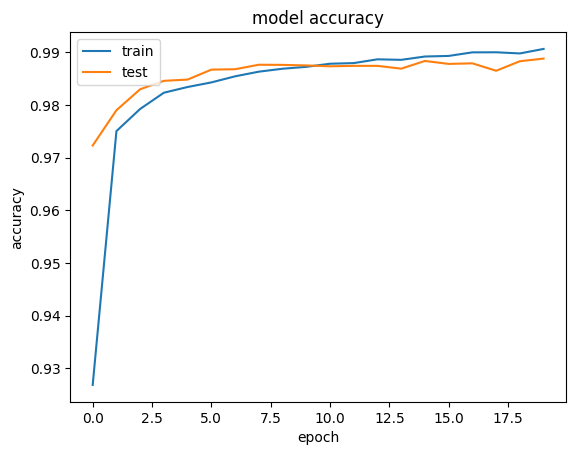

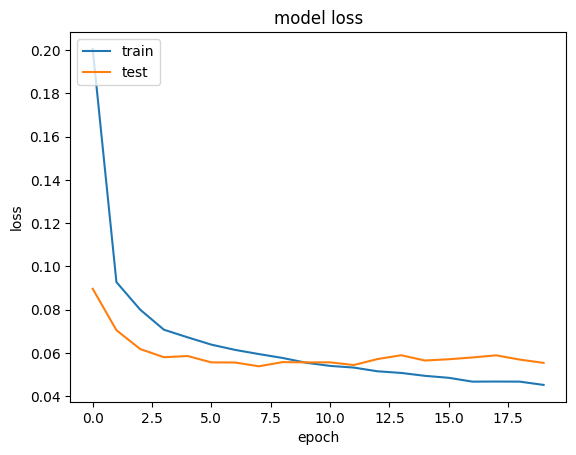

In [ ]:
plot_training_data(history)

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Bidirectional
#kernel_regularizer=regularizers.l1_l2(l1=1e-6, l2=1e-5)
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100)(deep_inputs)
BLSTM_Layer_1 = Bidirectional(LSTM(128, kernel_regularizer=regularizers.l1_l2(l1=1e-6, l2=1e-5)), input_shape=(maxlen, 1), merge_mode='concat')(embedding_layer)
dropout_layer1 = Dropout(0.7)(BLSTM_Layer_1)
dense_layer_1 = Dense(128, activation='sigmoid',kernel_regularizer=regularizers.l1_l2(l1=1e-6, l2=1e-5))(dropout_layer1)
dropout_layer2 = Dropout(0.7)(dense_layer_1)
dense_layer_2 = Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l1_l2(l1=1e-6, l2=1e-5))(dropout_layer2)
model_blstm_tune = Model(inputs=deep_inputs, outputs=dense_layer_2)
opt = Adam()
model_blstm_tune.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])

In [ ]:
history = model_blstm_tune.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
1176/1176 [==============================] - 60s 48ms/step - loss: 0.1174 - acc: 0.9602 - val_loss: 0.0592 - val_acc: 0.9850
Epoch 2/20
1176/1176 [==============================] - 39s 33ms/step - loss: 0.0534 - acc: 0.9870 - val_loss: 0.0560 - val_acc: 0.9850
Epoch 3/20
1176/1176 [==============================] - 37s 32ms/step - loss: 0.0455 - acc: 0.9893 - val_loss: 0.0572 - val_acc: 0.9855
Epoch 4/20
1176/1176 [==============================] - 38s 32ms/step - loss: 0.0416 - acc: 0.9900 - val_loss: 0.0589 - val_acc: 0.9849
Epoch 5/20
1176/1176 [==============================] - 37s 31ms/step - loss: 0.0363 - acc: 0.9916 - val_loss: 0.0612 - val_acc: 0.9841
Epoch 6/20
1176/1176 [==============================] - 39s 33ms/step - loss: 0.0323 - acc: 0.9922 - val_loss: 0.0683 - val_acc: 0.9851
Epoch 7/20
1176/1176 [==============================] - 37s 32ms/step - loss: 0.0296 - acc: 0.9933 - val_loss: 0.0671 - val_acc: 0.9837
Epoch 8/20
1176/1176 [==========================

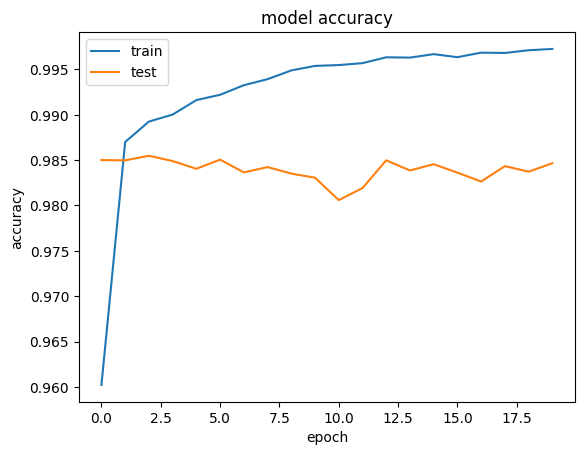

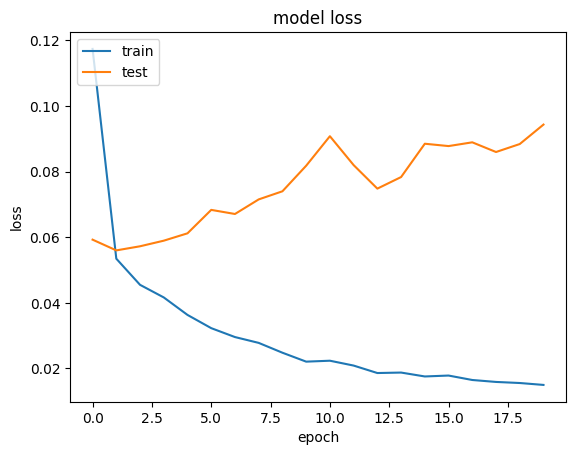

In [ ]:
plot_training_data(history)

# Evaluation of Models and Saving Best Model

In [ ]:
# y_pred_lstm_trans = model_lstm_trans.predict(X_test).ravel()
# fpr_lstm_trans, tpr_lstm_trans, thresholds_lstm_trans = roc_curve(y_test, y_pred_lstm_trans)
# auc_lstm_trans = auc(fpr_lstm_trans, tpr_lstm_trans)

In [ ]:
y_pred_lstm_trans_reg = model_lstm_trans_reg.predict(X_test).ravel()
fpr_lstm_trans_reg, tpr_lstm_trans_reg, thresholds_lstm_trans_reg = roc_curve(y_test, y_pred_lstm_trans_reg)
auc_lstm_trans_reg = auc(fpr_lstm_trans_reg, tpr_lstm_trans_reg)

1470/1470 [==============================] - 9s 6ms/step


In [ ]:
y_pred_lstm_trans_tune = model_lstm_trans_tune.predict(X_test).ravel()
fpr_lstm_trans_tune, tpr_lstm_trans_tune, thresholds_lstm_trans_tune = roc_curve(y_test, y_pred_lstm_trans_tune)
auc_lstm_trans_tune = auc(fpr_lstm_trans_tune, tpr_lstm_trans_tune)

1470/1470 [==============================] - 8s 5ms/step


In [ ]:
y_pred_lstm_tune = model_lstm_tune.predict(X_test).ravel()
fpr_lstm_tune, tpr_lstm_tune, thresholds_lstm_tune = roc_curve(y_test, y_pred_lstm_tune)
auc_lstm_tune = auc(fpr_lstm_tune, tpr_lstm_tune)

1470/1470 [==============================] - 7s 5ms/step


In [ ]:
y_pred_dt = dt.predict_proba(X_test_de)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_de, y_pred_dt)
auc_dt = auc(fpr_dt, tpr_dt)

y_pred_rf = rf.predict_proba(X_test_de)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_de, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

In [ ]:
y_pred_lr = lr.predict_proba(X_test_de)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_de, y_pred_lr)
auc_lr = auc(fpr_lr, tpr_lr)

In [ ]:
y_pred_blstm_trans = model_blstm_trans.predict(X_test).ravel()
fpr_blstm_trans, tpr_blstm_trans, thresholds_blstm_trans = roc_curve(y_test, y_pred_blstm_trans)
auc_blstm_trans = auc(fpr_blstm_trans, tpr_blstm_trans)

1470/1470 [==============================] - 10s 7ms/step


In [ ]:
y_pred_blstm_tune = model_blstm_tune.predict(X_test).ravel()
fpr_blstm_tune, tpr_blstm_tune, thresholds_blstm_tune = roc_curve(y_test, y_pred_blstm_tune)
auc_blstm_tune = auc(fpr_blstm_tune, tpr_blstm_tune)

1470/1470 [==============================] - 10s 7ms/step


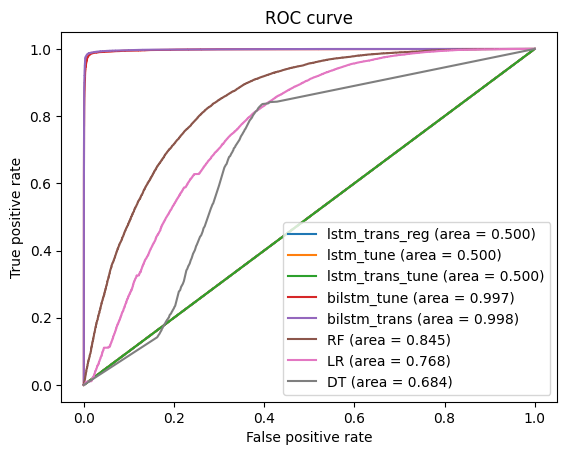

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lstm_trans_reg, tpr_lstm_trans_reg, label='lstm_trans_reg (area = {:.3f})'.format(auc_lstm_trans_reg))
plt.plot(fpr_lstm_tune, tpr_lstm_tune, label='lstm_tune (area = {:.3f})'.format(auc_lstm_tune))
plt.plot(fpr_lstm_trans_tune, tpr_lstm_trans_tune, label='lstm_trans_tune (area = {:.3f})'.format(auc_lstm_trans_tune))
plt.plot(fpr_blstm_tune, tpr_blstm_tune, label='bilstm_tune (area = {:.3f})'.format(auc_blstm_tune))
plt.plot(fpr_blstm_trans, tpr_blstm_trans, label='bilstm_trans (area = {:.3f})'.format(auc_blstm_trans))
# pplt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.plot(fpr_lr, tpr_lr, label='LR (area = {:.3f})'.format(auc_lr))
plt.plot(fpr_dt, tpr_dt, label='DT (area = {:.3f})'.format(auc_dt))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Choosing and Saving Best Model model_blstm_trans

In [ ]:
conf(model_blstm_trans,0.2,X_test,y_test)

1470/1470 [==============================] - 15s 10ms/step


array([[20201,   403],
       [  271, 26147]])

In [ ]:
model_blstm_trans.save("/content/drive/MyDrive/AI and ML/model_blstm_trans.h5")
print("Saved model to disk")

Saved model to disk


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
model_blstm_trans = load_model('/content/drive/MyDrive/AI and ML/model_blstm_trans.h5')
# summarize model.
model_blstm_trans.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 200, 100)          7389200   
                                                                 
 bidirectional (Bidirection  (None, 128)               84480     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                           

In [ ]:
#Save tokenizer then load tokenizer in the directory /content/drive/MyDrive/AI and ML/
import tensorflow as tf
tokenizer_json = tokenizer.to_json()
with open('/content/drive/MyDrive/AI and ML/tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(tokenizer_json)

# Reload the tokenizer later
with open('/content/drive/MyDrive/AI and ML/tokenizer.json', 'r', encoding='utf-8') as f:
    tokenizer_json = f.read()
tokenizer = tf.keras.preprocessing.text.tokenizer_from_json(tokenizer_json)


In [ ]:
#pridict using model model_blstm_trans for sentence

sentence = preprocess_text("What is your hobby?")
X = []
X.append(sentence)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, padding='post', maxlen=200)
y_pred = model_blstm_trans.predict(X).ravel()
print(y_pred)


1/1 [==============================] - 0s 23ms/step
[0.99975437]
